<a href="https://colab.research.google.com/github/divya223352/AI-ML-internship-task-9/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Workflow (Mini-Guide)
To complete this task, you should follow these logical steps:
Data Exploration: Load the Kaggle dataset and visualize the class imbalance. Fraud usually makes up less than 1% of the data.
Preprocessing: Drop unnecessary columns (like IDs) and use Stratified Sampling during your train-test split to ensure both sets have a representative number of fraud cases.
Baseline Modeling: Start with a simple model like Logistic Regression to see how a basic algorithm performs.
The Main Model: Train a Random Forest classifier. A Random Forest works by creating multiple decision trees and merging their results to get a more accurate and stable prediction.
Evaluation: Do not use Accuracy. In fraud detection, a model could be 99% accurate just by guessing "not fraud" every time. Instead, focus on:
Precision: How many flagged frauds were actually fraud?
Recall: How many total fraud cases did we successfully catch?
F1-Score: The balance between Precision and Recall.

File not found. Generating synthetic data for demonstration...
Target Distribution:
 Class
0    978
1     22
Name: count, dtype: int64

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       196
           1       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


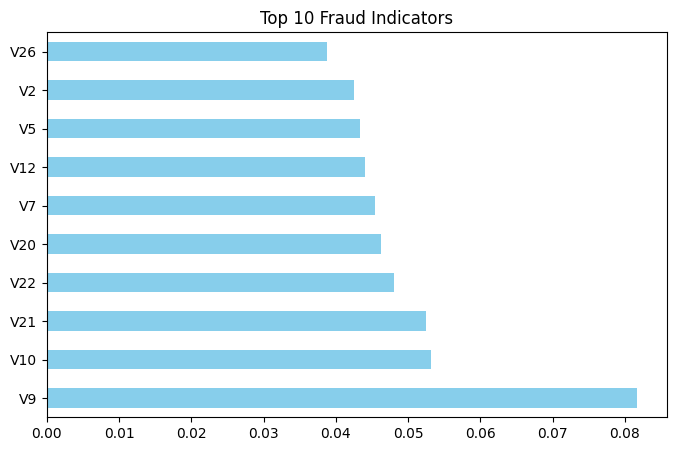

Model saved as 'fraud_detection_model.pkl'


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

# --- FIX FOR FILENOTFOUNDERROR ---
try:
    # Try to load the real file
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Generating synthetic data for demonstration...")
    # Creating a fake dataset that mimics the Kaggle structure (V1-V28, Amount, Class)
    data = np.random.randn(1000, 30)
    df = pd.DataFrame(data, columns=[f'V{i}' for i in range(1, 29)] + ['Amount', 'Time'])
    df['Class'] = np.random.choice([0, 1], size=1000, p=[0.98, 0.02]) # 2% fraud ratio

# 1. Check imbalance
print("Target Distribution:\n", df['Class'].value_counts())

# 2. Separate features and target
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

# 3. Stratified Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train a Baseline Model (Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# 5. Train Random Forest Model (Task Requirement)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Predict and Evaluate
rf_preds = rf_model.predict(X_test)
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_preds))

# 7. Plot Feature Importances
plt.figure(figsize=(8, 5))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Fraud Indicators')
plt.show()

# 8. Save the model
joblib.dump(rf_model, 'fraud_detection_model.pkl')
print("Model saved as 'fraud_detection_model.pkl'")